<a href="https://colab.research.google.com/github/Abhiss123/AlmaBetter-Projects/blob/main/NMF_Based_Topic_Modeling_for_SEO_and_Engagement_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name : NMF-Based Topic Modeling for SEO and Engagement Insights

**Purpose of the Project (Topic Modeling and Content Analysis using NMF)**

* The primary purpose of this project, at its initial stage, is to help a website owner or content creator gain insights into the **key topics or themes that are prevalent across the different pages of their website.** By using **Non-negative Matrix Factorization (NMF),** we can automatically identify these hidden topics from the **text of multiple webpages** without needing to **manually read through each page.**

**This process is useful for:**

* **Understanding the focus** of the content across a website.

* **Identifying common themes or topics** that the website covers.

* **Helping website owners** align their content with their business or marketing goals by analyzing which topics are emphasized.


In this project, we used **Non-negative Matrix Factorization (NMF)** to analyze the **text from multiple pages of a website.** The purpose is to identify the **key topics and themes that are present across the website**, giving the owner clear **insights into what their content is focused on**. By understanding these topics, the **business can:**

* **Ensure their content aligns with their business goals.**

* **Adjust their content strategy based on the topics that are covered.**

* **Identify opportunities for new content creation or optimization.**

# What is Non-negative Matrix Factorization (NMF)?

**Non-negative Matrix Factorization (NMF)** is a technique used in data analysis and machine learning to break down a **large matrix (table of numbers) into smaller pieces.** The key feature of NMF is that it works only with **non-negative numbers (numbers greater than or equal to zero)**. It’s used to simplify complex data into more manageable parts while preserving essential information. Think of it like **breaking down a large document into a few main topics.**

# How Does NMF Work?

Imagine you have a large dataset, like a collection of documents, where each document can be represented by the frequency of words (or terms) that appear in it. NMF takes this data and tries to group it into patterns. It breaks down the data into two smaller matrices:

1. **Basis matrix:** This tells you the "topics" or patterns found in the data.

2. **Coefficient matrix:** This tells you how strongly each document (or piece of data) belongs to each topic.

# Use Cases of NMF

*  **Topic Modeling:** NMF is often used in topic modeling, which means **discovering the main themes in a large collection of documents.** For example, if you feed a collection of news articles into NMF, it might group the articles into **topics like "sports," "politics," and "technology"** based on the words in them.

*  **Content Analysis:** In content analysis, NMF can help in **breaking down huge amounts of unstructured data (like text) into meaningful parts**, making it easier to understand or classify. For example, it can analyze customer reviews to find the most talked-about features of a product.

*  **Image Processing:** NMF can be used to **break down images into their component parts**, helping with things like facial recognition by identifying different parts of a face (eyes, nose, etc.) based on pixel values.

*  **Music or Sound Processing:** In **audio processing**, NMF can separate different sound sources in a recording (like separating vocals from instruments in a song).







In [ ]:
# Step 1: Import necessary libraries
# We need these libraries to fetch web content, process the text, and apply the NMF model.

import requests  # This library helps in fetching the content of web pages
from sklearn.feature_extraction.text import TfidfVectorizer  # Converts text into numerical format
from sklearn.decomposition import NMF  # The actual NMF model
from bs4 import BeautifulSoup  # Used for extracting text from the HTML of web pages

# Step 1: Import necessary libraries

       import requests

**Purpose:**

*  **requests** is a library that allows us to **fetch data** from the web. Specifically, it helps us **download the content of web pages** so that we can analyze them.

**Use Case:**

* Imagine you have a list of webpages, like those from a blog or service section of a website. **requests** allows us to pull the text content from those pages by sending a request to the webpage. This is similar to how a browser loads a page when you visit it, but in this case, we’re doing it programmatically to collect the data.

       from sklearn.feature_extraction.text import TfidfVectorizer

**Purpose:**

*  **TfidfVectorizer** is a tool that helps us **convert text into numbers.** In this case, it's transforming the words on a webpage into a format that the computer can understand for further analysis.

**Use Case:**

*  When we analyze text, the computer can’t understand words like **"SEO" or "traffic" directly.** **TfidfVectorizer turns these words into a matrix of numbers based on how frequently each word appears** and how important it is relative to other words in the document. This allows us to use mathematical models (like NMF) on the text.

*  **Example:** If a webpage frequently mentions "SEO" but only mentions "Google" once, TF-IDF will give "SEO" a higher value to show its importance.


         from sklearn.decomposition import NMF

**Purpose:**

*  **NMF (Non-negative Matrix Factorization)** is the core model that we are using to perform topic modeling. This tool will discover the hidden topics in the text by breaking down the TF-IDF matrix (the numerical representation of the text) into smaller, understandable groups of words (topics).

**Use Case:**

*  Let’s say you have **content from 10 webpages,** but you **don’t want to read through all of them.** **NMF will analyze the text and tell you what topics are discussed on those pages by grouping related words**. For example, it may tell you that one topic is about **"SEO optimization"** and another is about **"content marketing"** based on the **most frequent and important words.**

       from bs4 import BeautifulSoup

**Purpose:**

*  **BeautifulSoup is a library used to extract the text from HTML.** Web pages are written in a **format called HTML,** which includes **not only the visible text but also a lot of code (like headers, footers, and navigation menus).** BeautifulSoup helps us **strip away** all the **unnecessary code** and focus only on the **important text we want to analyze.**

**Use Case:**

*  When you open a webpage, you see text, images, and links, but behind that, there is HTML code that tells the browser how to display everything. **BeautifulSoup** helps us pull out just the text content (like paragraphs and headings) from the HTML, which we can then analyze using NMF. For example, if you’re analyzing blog content, BeautifulSoup will **extract the actual blog post text, ignoring the page layout and formatting code.**





In [ ]:
def scrape_webpage(url):
    # Fetch the webpage content
    response = requests.get(url)

    # Check if the request was successful (status code 200 means OK)
    if response.status_code == 200:
        # Parse the HTML content of the page using BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extract the text content from all the <p> (paragraph) tags on the page
        text = ' '.join([p.get_text() for p in soup.find_all('p')])

        # Return the extracted text
        return text
    else:
        # If the request fails, return an empty string
        return ""

text

'$ RevenueGenerated via SEO Qualified LeadsGenerated  \n 8 years ago, we embarked on a journey to unravel the intricacies of the Google algorithm—a cryptic enigma begging to be deciphered. Consider it akin to unlocking a closely guarded secret, comparable only to the recipe of Coca Cola or the security measures surrounding the Crown Jewels of London. To traverse the Google maze, we decided to rewrite the rules and carve our own path. Our strategy? Develop proprietary AI algorithms to adeptly monitor and navigate the evolving landscape of the Google algorithm. To date, we\'ve pioneered an impressive portfolio of 753+ unique AI SEO algorithms, elevating the effectiveness and efficiency of our work. While SEO teams globally have traditionally relied on three key strategies—on-site SEO optimization, backlink building, and content creation and optimization—we at Thatware AI SEO have rewritten the playbook. Picture this scenario: Your company aspires to secure a coveted spot on page 1 for a 

# Step 1: Fetch the webpage content

      response = requests.get('https://thatware.co/')

**Explanation:**

* This line uses the **requests library** to fetch the webpage content from the URL **'https://thatware.co/'.** When you type a URL into a browser and hit enter, your browser sends a **request** to that webpage’s server, which responds by sending back the page content. The **requests.get() function** does the same thing but programmatically.

* It **fetches the entire HTML of the webpage** (the code that makes up the webpage, including the text, images, links, etc.) and stores the result in the variable response.

**Example:**

* If you visit the **https://thatware.co/** webpage in a browser, the browser retrieves the entire page, including all **text and images**. The same thing happens here, except the content is now stored in response for further processing.

# Step 2: Check if the request was successful

       if response.status_code == 200:

**Explanation:**

* Every time you make a request to a website, the server responds with a **status code** that tells you whether the **request was successful or not.**

* **200** means the **request was successful** and the **server returned the webpage content as expected.**

* If the request was successful (status code 200), we move on to the next step and start working with the webpage content.

**Example:**

**Status codes:**

*  **200 = Success** (the page was found and loaded correctly).

*  **404 = Not found** (the page doesn’t exist).

*  **500 = Server error** (something went wrong on the server's side).

If the server returned **200,** it means the **webpage content** is available for us to **extract.**




# Step 3: Parse the HTML content using BeautifulSoup

      soup = BeautifulSoup(response.content, 'html.parser')

**Explanation:**

* This line uses BeautifulSoup to parse (analyze and process) the HTML content of the webpage.

* **response.content** contains the raw HTML code of the webpage. This includes all the text, images, styles, and other elements on the page.

* **BeautifulSoup** helps break down the HTML into its components, making it easier to extract specific elements like the text in paragraph tags, links, headings, etc.

*  **'html.parser'** is the method BeautifulSoup uses to read the HTML. It tells BeautifulSoup how to interpret the HTML code.

**Example:**

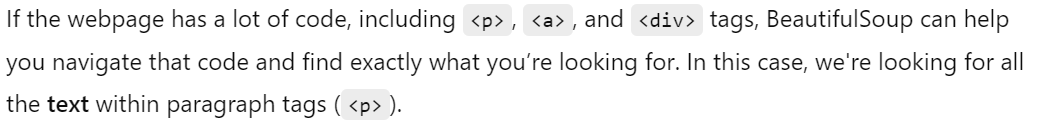


# Step 4: Extract the text from all paragraph tags

       text = ' '.join([p.get_text() for p in soup.find_all('p')])
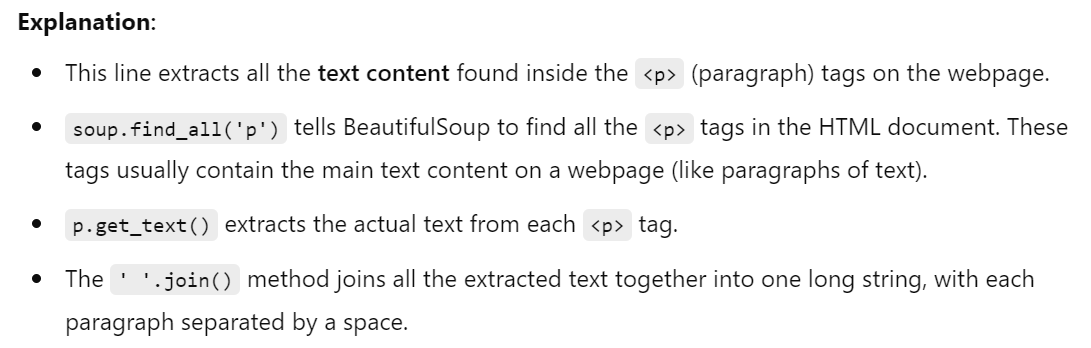


In [ ]:
# Step 3: Scrape multiple webpages (you provided 13 URLs) and store their content

# List of URLs to scrape (the URLs you provided)
urls = [
    'https://thatware.co/',
    'https://thatware.co/why-ai/',
    'https://thatware.co/advanced-seo-services/',
    'https://thatware.co/ai-based-seo-services/',
    'https://thatware.co/digital-marketing-services/',
    'https://thatware.co/managed-seo/',
    'https://thatware.co/starter-seo-services/',
    'https://thatware.co/business-intelligence-services/',
    'https://thatware.co/link-building-services/',
    'https://thatware.co/branding-press-release-services/',
    'https://thatware.co/conversion-rate-optimization/',
    'https://thatware.co/content-proofreading-services/',
    'https://thatware.co/content-writing-services/'
]

# Scrape the content of each URL and store it in a list
documents = [scrape_webpage(url) for url in urls]

documents

['$ RevenueGenerated via SEO Qualified LeadsGenerated  \n 8 years ago, we embarked on a journey to unravel the intricacies of the Google algorithm—a cryptic enigma begging to be deciphered. Consider it akin to unlocking a closely guarded secret, comparable only to the recipe of Coca Cola or the security measures surrounding the Crown Jewels of London. To traverse the Google maze, we decided to rewrite the rules and carve our own path. Our strategy? Develop proprietary AI algorithms to adeptly monitor and navigate the evolving landscape of the Google algorithm. To date, we\'ve pioneered an impressive portfolio of 753+ unique AI SEO algorithms, elevating the effectiveness and efficiency of our work. While SEO teams globally have traditionally relied on three key strategies—on-site SEO optimization, backlink building, and content creation and optimization—we at Thatware AI SEO have rewritten the playbook. Picture this scenario: Your company aspires to secure a coveted spot on page 1 for a

In [ ]:
# Step 4: Preprocess the scraped text using TF-IDF
# TF-IDF (Term Frequency-Inverse Document Frequency) converts text into numbers based on word importance.
# This is necessary because NMF can only work with numbers, not text.

# Create a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Apply TF-IDF on the list of documents (the webpage contents) to convert them into a matrix of numbers
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
tfidf_matrix

<13x1673 sparse matrix of type '<class 'numpy.float64'>'
	with 6596 stored elements in Compressed Sparse Row format>

In [ ]:
# Step 5: Apply the NMF model
# Now that we have the numerical matrix (TF-IDF), we can apply NMF to find topics in the content.

# Initialize the NMF model with a number of topics (let's choose 5 topics for simplicity)
nmf_model = NMF(n_components=5, random_state=42)

# Fit the NMF model to the TF-IDF matrix and extract the topic components
nmf_model.fit(tfidf_matrix)

NMF(n_components=5, random_state=42)

# Step 5: Apply the NMF Model

This step involves applying the **NMF model** to the **TF-IDF matrix** to discover **topics in the text data**. The TF-IDF matrix represents the **text as numbers**, and the **NMF model will extract hidden topics by grouping words that frequently appear together.**

         # Initialize the NMF model with a number of topics (let's choose 5 topics for simplicity)
         nmf_model = NMF(n_components=5, random_state=42)

**Explanation:**

**NMF(n_components=5):**

* **NMF (Non-negative Matrix Factorization)** is a mathematical model that helps identify latent (hidden) topics in text data.

* **n_components=5** specifies that we want to **discover 5 topics.** You can adjust this number based on how many topics you want to find in the text.

*  Each topic will be represented as a set of words that commonly appear together in the documents (webpages).

**random_state=42:**

*  **random_state** ensures that the results are reproducible. If you run the code again with the same random state, you’ll get the same results. This is useful for consistency.

*  **42** is just a random number used to seed the random number generator. You can use any number here, but using a fixed value ensures that the model behaves the same way every time it’s run.

**Example:**

Let’s say you're analyzing several blog posts on SEO. By setting n_components=5, the NMF model will try to find 5 different topics, such as **"SEO strategies", "content marketing", "link building", "social media", and "Google algorithms."**

       # Fit the NMF model to the TF-IDF matrix and extract the topic components
       nmf_model.fit(tfidf_matrix)

**Explanation:**

**nmf_model.fit(tfidf_matrix):**

* **tfidf_matrix** is the numerical representation of the text data (i.e., the text has been transformed into numbers using TF-IDF).

* **fit()** means we are training the NMF model on the TF-IDF matrix. The model will learn the underlying topics by finding patterns in how words co-occur across documents (webpages).

*  The NMF model will factorize the TF-IDF matrix into two smaller matrices:

*  **One that represents topics** (what words belong to each topic).

*  **One that represents document-topic relationships** (which topics are covered in each document).




# What Happens Behind the Scenes:

**The TF-IDF matrix is a large matrix where:**

* Each row corresponds to a document (in this case, a webpage).

*  Each column corresponds to a word (a term from the text).

* The values in the matrix represent how important a word is in a particular document.

When we apply NMF to this matrix, it breaks the matrix down into two smaller matrices:

*  One matrix tells us which words are most important for each topic.

*  The other matrix tells us which topics are present in each document.

**Example:**

Suppose we have the following words:** "SEO", "Google", "content", "marketing", "keywords", and "algorithm".**

**The NMF model might group these words into 5 topics like this:**

*  **Topic 1: "SEO", "Google", "algorithm"** (related to search engine optimization)

*  **Topic 2: "content", "marketing", "keywords"** (related to content marketing)

Each topic represents a group of words that frequently appear together. The model also learns which topics are present in each document.

In [ ]:
# Step 6: Define a function to display the top words in each topic
# This will help us understand what each topic is about by showing the most important words for each topic.

def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))



# Step 6: Define a Function to Display the Top Words in Each Topic

This function display_topics is meant to show the most important words for each topic identified by the NMF model. By displaying these top words, you can understand what the topic is generally about, without having to dig too deeply into the mathematical details.

      def display_topics(model, feature_names, num_top_words):

**Explanation:**

We are defining a function called **display_topics**. This function takes three inputs:

* **model:** This is the **NMF model** that has been trained on the text data. The model has identified different topics.

* **feature_names:** These are the words in the **original text, extracted using TF-IDF.** Each word corresponds to a "feature" (or column) in the matrix.

*  **num_top_words:** The number of top words we want to display for each topic. For example, if we set this to 10, the function will show the 10 most important words in each topic.

          for topic_idx, topic in enumerate(model.components_):

**Explanation:**

*  This line creates a loop that goes through each topic identified by the NMF model.

*  **model.components_** contains the topics generated by the NMF model. Each topic is represented as a list of numbers (weights) that correspond to the importance of each word (feature) in that topic.

*  **enumerate(model.components_)** gives us two values:

* **topic_idx:** The index number of the topic (starting from 0).

*  **topic:** The list of weights for that particular topic.

**Example:**

*  If the model has discovered 3 topics, this loop will run 3 times, once for each topic. **topic_idx** will be 0 for the first topic, 1 for the second, and so on.

              print(f"Topic {topic_idx + 1}:")

**Explanation:**

* This line prints the **topic number.** We add 1 to **topic_idx** because **topic_idx starts at 0,** but we want to display the topic numbers starting from 1 (for clarity).

* This line simply labels each topic, so when you see the output, you'll know which words belong to which topic.


                 print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

**Explanation:**

*  This line prints the top words for each topic.

Let’s break it down step by step:

**topic.argsort():**

*  **argsort()** sorts the values (weights) in the topic and returns the indices of the sorted values. The words with the highest weights (most important words) come at the end.

**[:-num_top_words - 1:-1]:**

*  This part is slicing the array of indices to get the top num_top_words. It starts from the end (highest weight) and selects the top N words.
For example, if num_top_words is set to 10, it will select the 10 words with the highest weights (importance) for that topic.

**[feature_names[i] for i in ... ]:**

*  This is a list comprehension that turns the indices from the argsort() into actual words by looking them up in feature_names (the list of all words in the dataset).

**" ".join([...]):**

*  This takes the top words and joins them into a single string, with each word separated by a space. This makes the output more readable.

# Example Output:

Let’s say the most important words for a topic are **"SEO", "optimization",** and **"Google".** This line will print something like:

       
       SEO optimization Google



In [ ]:
# Step 7: Display the top words for each of the 5 topics
# We want to see the top 10 words for each topic to understand the main themes.

num_top_words = 10
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

print("Topics found by NMF:")
display_topics(nmf_model, tfidf_feature_names, num_top_words)

Topics found by NMF:
Topic 1:
search businesses small site results strategies visibility traffic presence google
Topic 2:
writers writer blog document word quality copy pages text team
Topic 3:
search user data algorithms optimization systems engine strategies artificial intent
Topic 4:
sure help make landing optimization improving rate user data button
Topic 5:
branding pr brand clients agency organizations data reviews analysis process


In [ ]:
# Step 1: Import necessary libraries
# We need these libraries to fetch web content, process the text, and apply the NMF model.

import requests  # This library helps in fetching the content of web pages
from sklearn.feature_extraction.text import TfidfVectorizer  # Converts text into numerical format
from sklearn.decomposition import NMF  # The actual NMF model
from bs4 import BeautifulSoup  # Used for extracting text from the HTML of web pages

# Step 2: Define a function to scrape text from a webpage using its URL

def scrape_webpage(url):
    # Fetch the webpage content
    response = requests.get(url)

    # Check if the request was successful (status code 200 means OK)
    if response.status_code == 200:
        # Parse the HTML content of the page using BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extract the text content from all the <p> (paragraph) tags on the page
        text = ' '.join([p.get_text() for p in soup.find_all('p')])

        # Return the extracted text
        return text
    else:
        # If the request fails, return an empty string
        return ""

# Step 3: Scrape multiple webpages (you provided 13 URLs) and store their content

# List of URLs to scrape (the URLs you provided)
urls = [
    'https://thatware.co/',
    'https://thatware.co/why-ai/',
    'https://thatware.co/advanced-seo-services/',
    'https://thatware.co/ai-based-seo-services/',
    'https://thatware.co/digital-marketing-services/',
    'https://thatware.co/managed-seo/',
    'https://thatware.co/starter-seo-services/',
    'https://thatware.co/business-intelligence-services/',
    'https://thatware.co/link-building-services/',
    'https://thatware.co/branding-press-release-services/',
    'https://thatware.co/conversion-rate-optimization/',
    'https://thatware.co/content-proofreading-services/',
    'https://thatware.co/content-writing-services/'
]

# Scrape the content of each URL and store it in a list
documents = [scrape_webpage(url) for url in urls]

# Step 4: Preprocess the scraped text using TF-IDF
# TF-IDF (Term Frequency-Inverse Document Frequency) converts text into numbers based on word importance.
# This is necessary because NMF can only work with numbers, not text.

# Create a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Apply TF-IDF on the list of documents (the webpage contents) to convert them into a matrix of numbers
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Step 5: Apply the NMF model
# Now that we have the numerical matrix (TF-IDF), we can apply NMF to find topics in the content.

# Initialize the NMF model with a number of topics (let's choose 5 topics for simplicity)
nmf_model = NMF(n_components=5, random_state=42)

# Fit the NMF model to the TF-IDF matrix and extract the topic components
nmf_model.fit(tfidf_matrix)

# Step 6: Define a function to display the top words in each topic
# This will help us understand what each topic is about by showing the most important words for each topic.

def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

# Step 7: Display the top words for each of the 5 topics
# We want to see the top 10 words for each topic to understand the main themes.

num_top_words = 10
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

print("Topics found by NMF:")
display_topics(nmf_model, tfidf_feature_names, num_top_words)

# Step 8: Interpret the results
# The model will print out 5 topics, each with 10 words that represent the core ideas in the content.
# By looking at these words, we can understand what each topic is about.

# Example output:
# Topic 1 might contain words like 'seo', 'services', 'ai', indicating it relates to SEO services with AI.
# Topic 2 might contain words like 'digital', 'marketing', 'campaign', indicating it relates to digital marketing.


Topics found by NMF:
Topic 1:
search businesses small site results strategies visibility traffic presence google
Topic 2:
writers writer blog document word quality copy pages text team
Topic 3:
search user data algorithms optimization systems engine strategies artificial intent
Topic 4:
sure help make landing optimization improving rate user data button
Topic 5:
branding pr brand clients agency organizations data reviews analysis process


# What Kind of Content Analysis Did the NMF Code Perform?

The **NMF model performed topic modeling**, which is a form of content analysis. Here’s what this means:

**1. Content Analysis:** The **NMF code analyzed the text content of multiple webpages** by breaking it down into **key topics**. It **grouped words** that **frequently appear together and identified patterns**, which resulted in the **5 distinct topics**. This is the essence of content analysis: finding the main themes or patterns in the text.

**2. What the Analysis Does:** The NMF model provided insight into what kinds of services and themes are most prominent on the website. For example, it showed that the website is heavily focused on SEO, content writing, AI-based tools, conversion optimization, and branding services. These topics help the owner understand the focus areas of their website content.

# Understanding the Output from NMF

The **NMF model** has identified **5 topics** from the text content of the webpages. Each topic is represented by a set of important words. Here’s what each of these topics means and how a website owner might interpret them:

**1. Topic 1:**

*  **Words:** **search, businesses, small, site, results, strategies, visibility, traffic, presence, google**

* **What it means:** This topic seems to be focused on **SEO strategies for small businesses**. It suggests that the content on Thatware.co has a lot of focus on helping small businesses increase their visibility and traffic on search engines like Google.

*  **How it helps the website owner:** The owner can understand that a significant portion of their website’s content is dedicated to offering strategies for small businesses to improve their search engine presence. To leverage this, they could create more specific guides or services targeting small business owners who want to improve their SEO results.

**2. Topic 2:**

*  **Words:** **writers, writer, blog, document, word, quality, copy, pages, text, team**

*  **What it means:** This topic is focused on **content writing and copywriting services.** It suggests that the website provides services or guidance related to writing quality content, such as blog posts and web copy.

*  **How it helps the website owner:** The website owner can see that content writing services are a strong theme. To increase their business, they could create more blog content, offer specialized content creation services, or highlight the expertise of their writing team. They could also promote content optimization for SEO, which ties into their existing SEO services.

**3. Topic 3:**

*  **Words: search, user, data, algorithms, optimization, systems, engine, strategies, artificial, intent**

*  **What it means:** This topic is about **AI-based search engine optimization (SEO) and using data and algorithms to optimize websites.** It suggests that the website discusses artificial intelligence (AI) strategies to understand user intent and improve search results.

*  **How it helps the website owner:** This indicates that the website emphasizes the use of AI in SEO. To capitalize on this, the website owner could highlight case studies or examples of how their AI tools help clients improve their SEO. They could also focus on educating potential clients about the advantages of AI in modern SEO practices.

**4.  Topic 4:**

*  **Words: sure, help, make, landing, optimization, improving, rate, user, data, button**

*  **What it means:** This topic seems to relate to **conversion rate optimization (CRO)**, which focuses on improving user interactions on landing pages to boost conversions (getting visitors to take actions like filling out forms or making purchases).

*  **How it helps the website owner:** The website owner can use this insight to build and promote services around improving landing page design and user experience. Offering tailored CRO services can attract businesses looking to improve the effectiveness of their websites in converting traffic into leads or sales.

**5. Topic 5:**

*  **Words: branding, pr, brand, clients, agency, organizations, data, reviews, analysis, process**

*  **What it means:** This topic is about **branding and public relations (PR) services.** It highlights how the website helps clients with their brand-building efforts and offers PR services, including reviews, data analysis, and strategic planning.

*  **How it helps the website owner:** The website owner can see that branding and PR are key themes. They could consider expanding their PR services or providing more detailed case studies about how they have helped clients build and improve their brand reputation. Additionally, they could use client testimonials to demonstrate successful branding outcomes.




# What Does This Output Mean for a Website Owner?

The output from the **NMF model** provides valuable insights into the key topics that are discussed across the webpages of **Thatware.co**. By understanding these topics, the website owner can:

**1. Identify Key Areas of Focus:** The output shows the main themes (SEO, content writing, AI-based optimization, CRO, branding) that the website content is currently focused on. This helps the owner understand what their website is "about" in terms of content and services.

**2. Tailor Marketing and Content Strategy:** Based on the topics, the owner can create more targeted marketing campaigns. For example, if the site is heavily focused on AI-based SEO, the owner might want to push marketing efforts to highlight their AI-driven tools and techniques.

**3. Create New Services or Improve Existing Ones:** The website owner can use the insights to either **expand existing services or introduce new ones.** For instance, if the topic around conversion rate optimization (Topic 4) is highly relevant, they could build out more detailed CRO services.

**4. Optimize Content for SEO:** Since one of the topics (Topic 1) relates to **SEO for small businesses**, the owner can ensure that their website is fully optimized to rank well for these services. This might involve adding more relevant keywords, creating blog posts around small business SEO, or offering targeted services for small businesses.

